In [408]:
import pandas as pd
import matplotlib.pyplot as plt

In [409]:
df = pd.read_csv('ds_salaries.csv')

In [410]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [411]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [413]:
df['experience_level'] = df['experience_level'].replace({
    'SE': 'Senior',
    'MI': 'Middle',
    'EN': 'Junior',
    'EX': 'Executive'
})

df['company_size'] = df['company_size'].replace({
    'L': 'Large',
    'S': 'Small',
    'M': 'Medium',
})

df['employment_type'] = df['employment_type'].replace({
    'FT': 'Full time',
    'CT': 'Contractor',
    'FL': 'Freelancer',
    'PT': 'Part time'
})

In [414]:
df.head(10)
a = df['salary_in_usd'].max()
a = a / 12
print(a * 80)

3000000.0


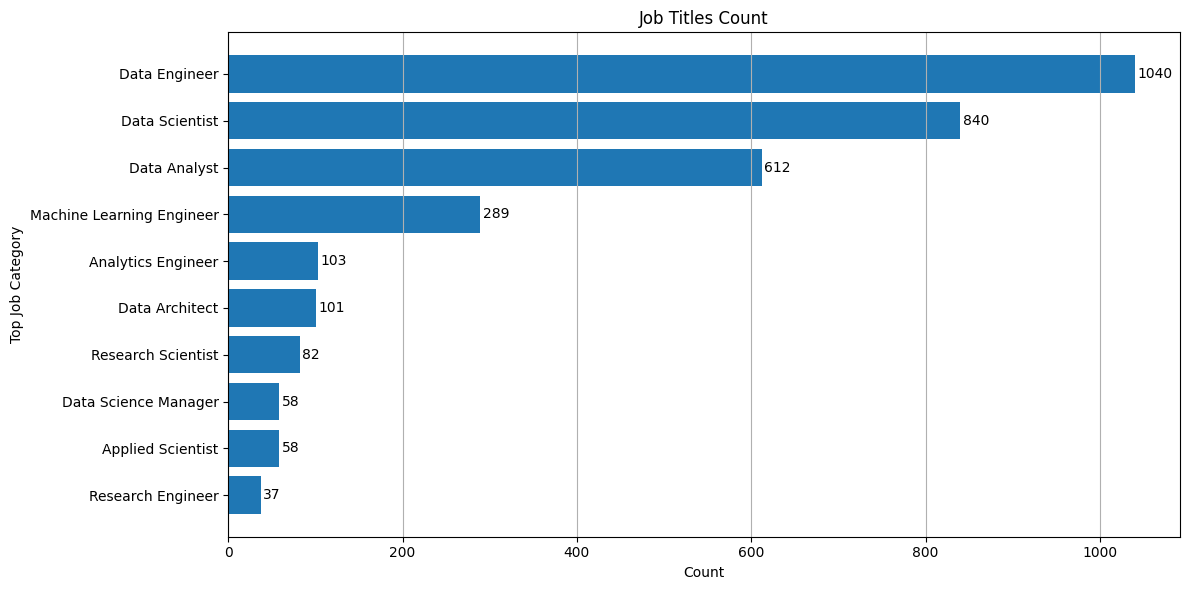

In [415]:
value_counts = df['job_title'].value_counts()
fig, ax = plt.subplots(figsize=(12, 6))
top_n = min(10, len(value_counts))
ax.barh(value_counts.index[:top_n][::-1], value_counts.values[:top_n][::-1])
ax.set_xlabel('Count')
ax.set_ylabel('Top Job Category')
ax.set_title('Job Titles Count')
ax.xaxis.grid(True)

for i, v in enumerate(value_counts.values[:top_n][::-1]):
    ax.text(v + 3, i, str(v), va='center')

plt.tight_layout()
plt.show()

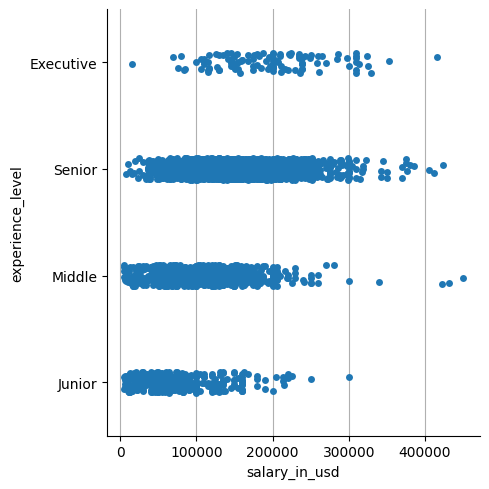

In [416]:
import seaborn as sns

axes = sns.catplot(data=df, x='salary_in_usd', y='experience_level', kind='strip',
                   order=['Executive', 'Senior', 'Middle', 'Junior']).axes.flatten()
for ax in axes:
    ax.xaxis.grid(True)

plt.show()

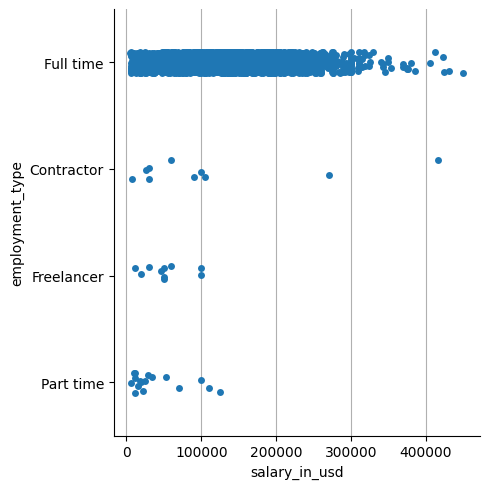

In [417]:
axes = sns.catplot(data=df, x='salary_in_usd', y='employment_type', kind='strip').axes.flatten()
for ax in axes:
    ax.xaxis.grid(True)

plt.show()

In [418]:
average_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean()
print(average_salary_by_experience / 12)


experience_level
Executive    16244.244152
Junior        6545.523698
Middle        8710.494928
Senior       12754.255962
Name: salary_in_usd, dtype: float64


In [419]:
df['job_title'].value_counts()

job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

In [420]:
job_counts = df['job_title'].value_counts()
print(job_counts)


job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64


<Figure size 1200x800 with 0 Axes>

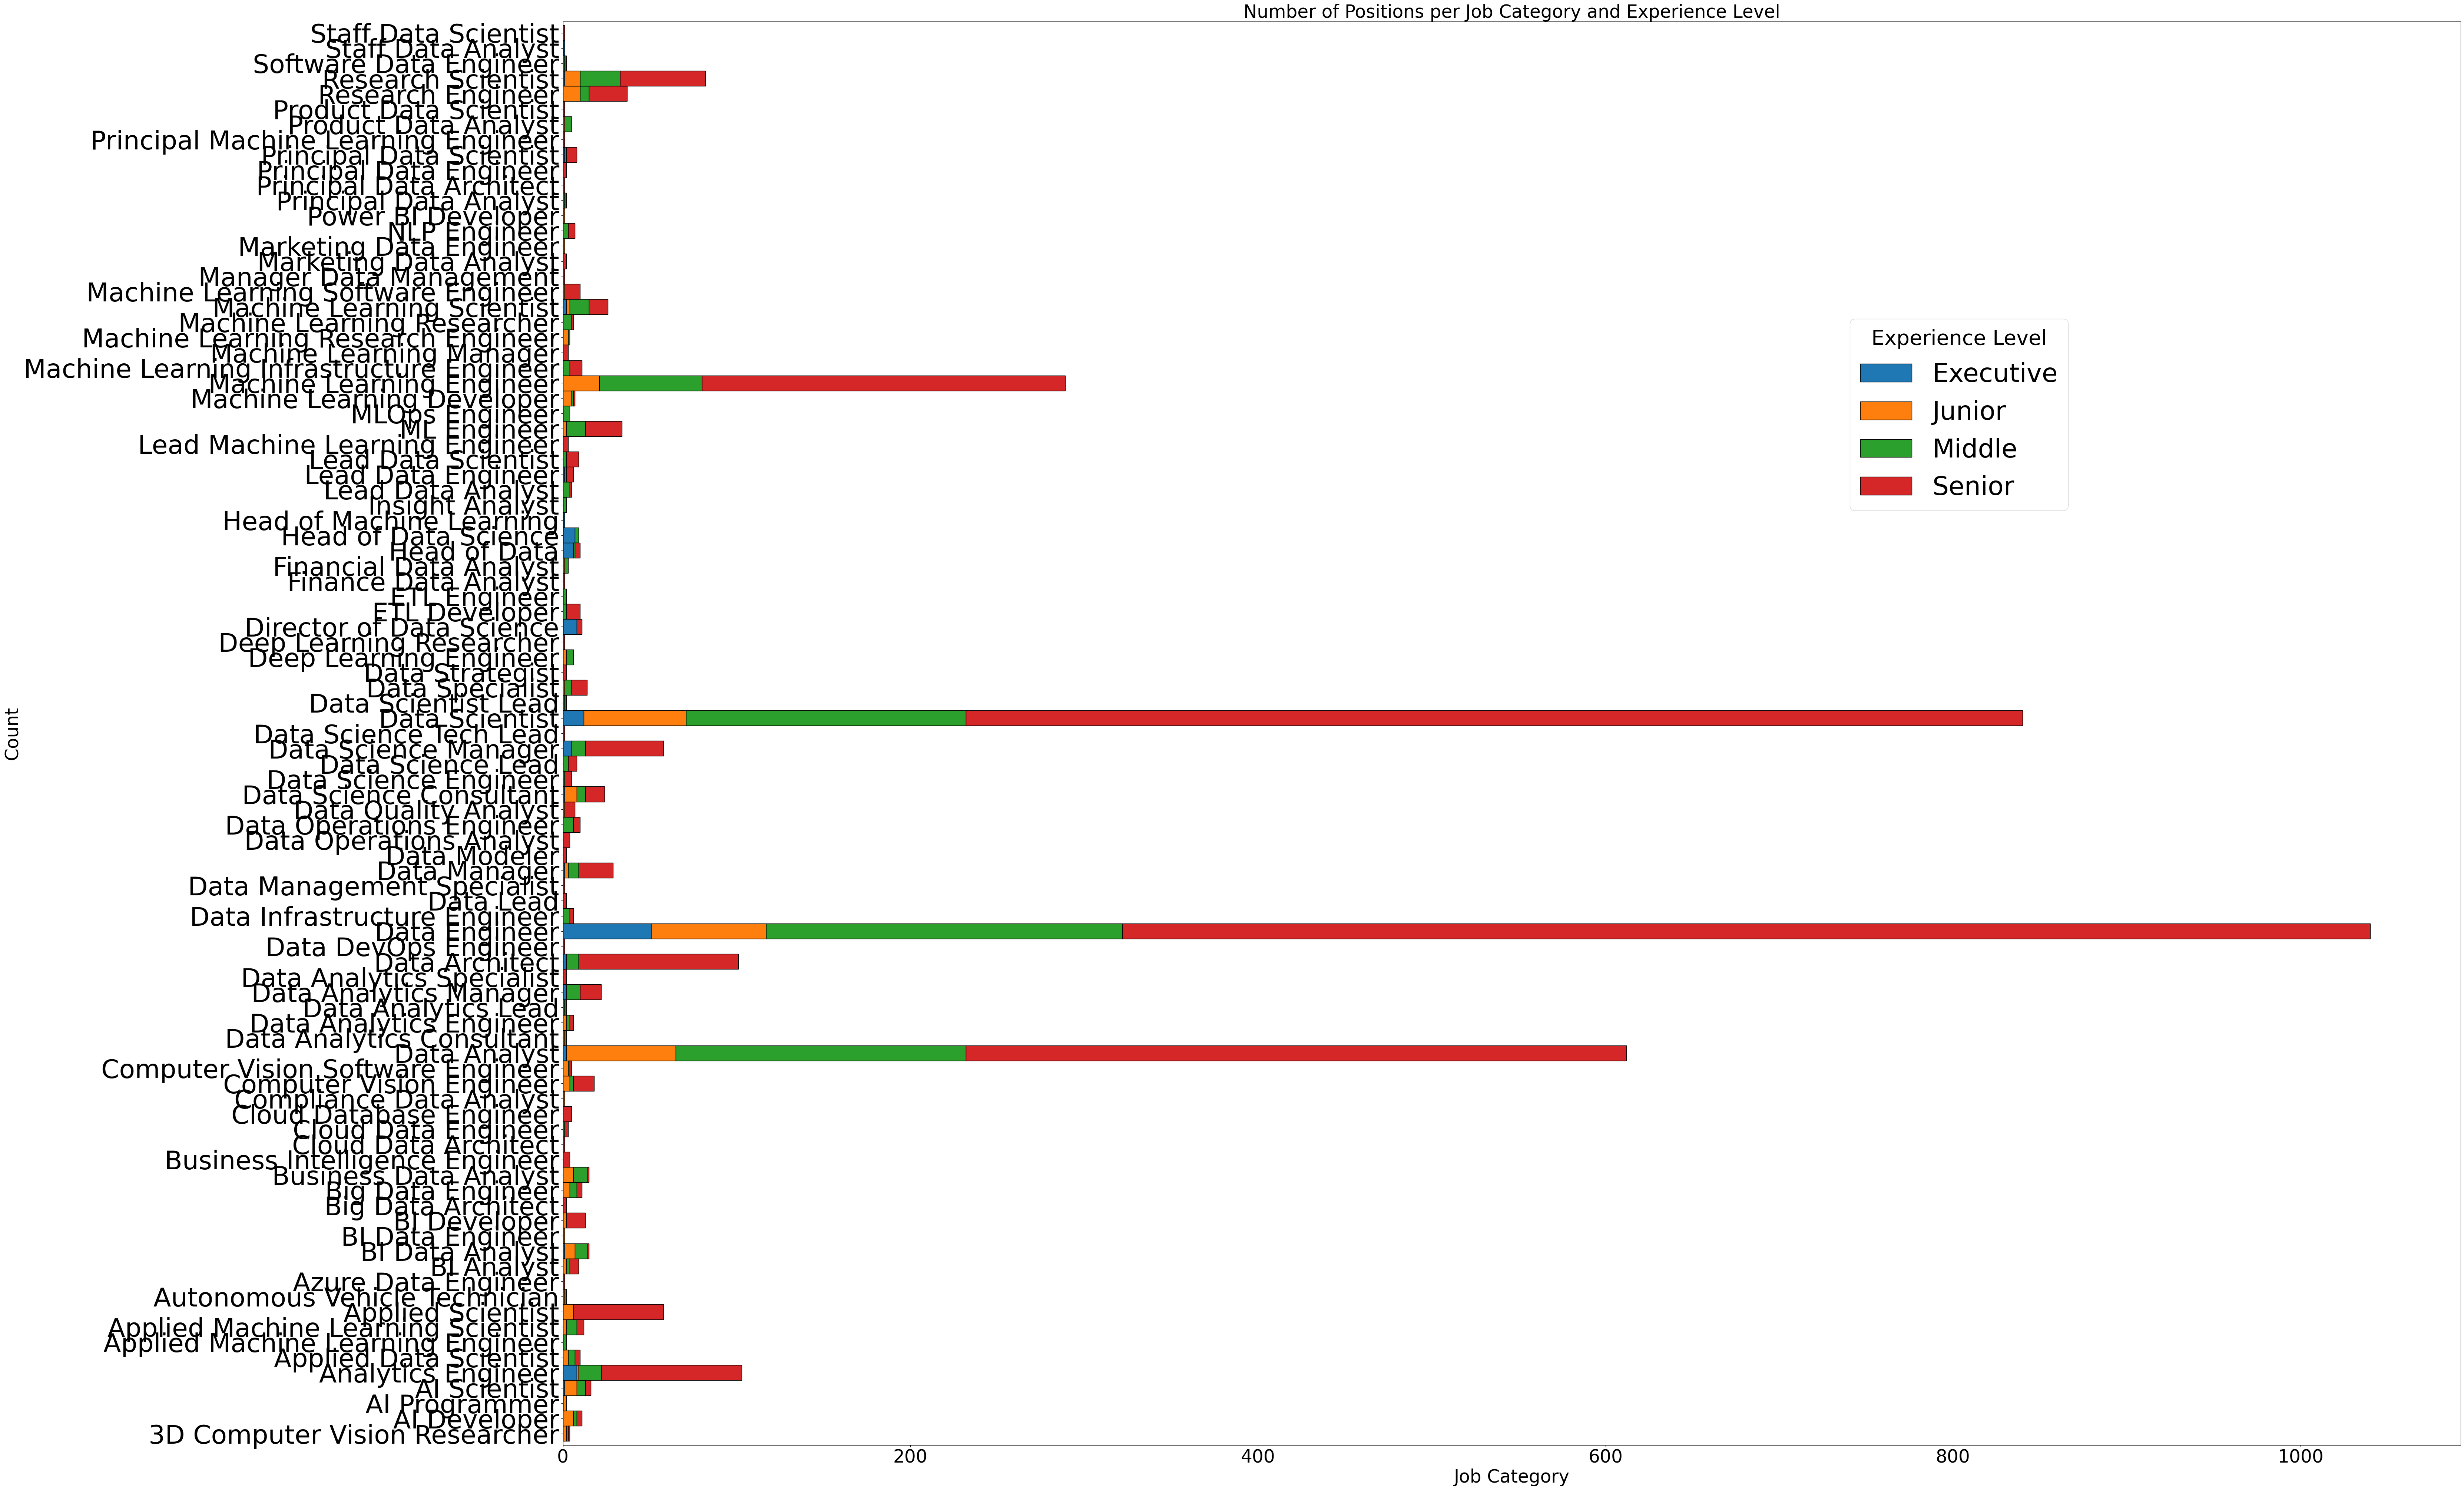

In [421]:
grouped_data = df.groupby(['job_title', 'experience_level']).size().unstack()

plt.figure(figsize=(12, 8))

# Your code for creating the plot
grouped_data.plot(kind='barh', stacked=True, edgecolor='k', width=1)

plt.xlabel('Job Category', fontsize=35)
plt.ylabel('Count', fontsize=35)
plt.title('Number of Positions per Job Category and Experience Level', fontsize=35)

plt.xticks(fontsize=35)
plt.yticks(fontsize=50)
plt.legend(title='Experience Level', bbox_to_anchor=(0.8, 0.8), fontsize=50, title_fontsize=40)

plt.subplots_adjust(left=1, right=9, bottom=1, top=9, hspace=.5)

plt.show()

In [422]:
data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst",
                    "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer",
                    "BI Data Engineer", "Power BI Developer"]
data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher",
                  "Deep Learning Researcher", "AI/Computer Vision Engineer"]
machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer",
                    "Principal Machine Learning Engineer"]
data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead",
              "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]

df['job_category'] = df['job_title'].apply(lambda x: "Data Engineering" if x in data_engineering
                                           else "Data Science" if x in data_scientist
                                           else "Machine Learning" if x in machine_learning
                                           else "Data Architecture" if x in data_architecture
                                           else "Management" if x in management
                                           else "Other")


In [423]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,Senior,Full time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,Large,Other
1,2023,Middle,Contractor,ML Engineer,30000,USD,30000,US,100,US,Small,Machine Learning
2,2023,Middle,Contractor,ML Engineer,25500,USD,25500,US,100,US,Small,Machine Learning
3,2023,Senior,Full time,Data Scientist,175000,USD,175000,CA,100,CA,Medium,Data Science
4,2023,Senior,Full time,Data Scientist,120000,USD,120000,CA,100,CA,Medium,Data Science
5,2023,Senior,Full time,Applied Scientist,222200,USD,222200,US,0,US,Large,Data Science
6,2023,Senior,Full time,Applied Scientist,136000,USD,136000,US,0,US,Large,Data Science
7,2023,Senior,Full time,Data Scientist,219000,USD,219000,CA,0,CA,Medium,Data Science
8,2023,Senior,Full time,Data Scientist,141000,USD,141000,CA,0,CA,Medium,Data Science
9,2023,Senior,Full time,Data Scientist,147100,USD,147100,US,0,US,Medium,Data Science


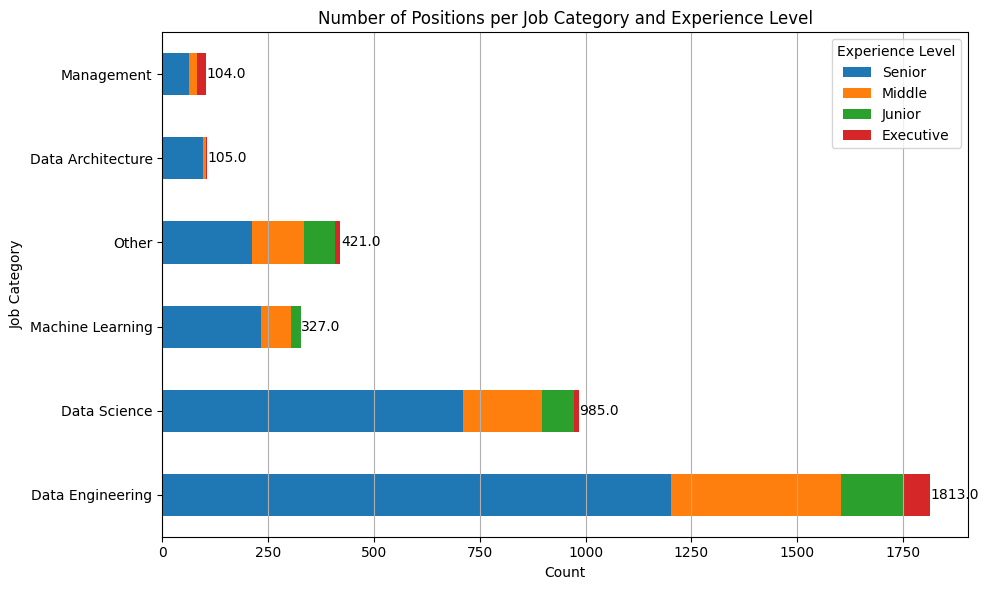

In [432]:
import matplotlib.pyplot as plt

grouped_data = df.groupby(['job_category', 'experience_level']).size().unstack()

new_order = ['Senior', 'Middle', 'Junior', 'Executive']
sorted_data = grouped_data.reindex(columns=new_order)

sorted_data = sorted_data.sort_values(by=new_order, ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
sorted_data.plot(kind='barh', stacked=True, ax=ax)

sorted_data['Total'] = sorted_data.sum(axis=1)

ax.set_xlabel('Count')
ax.set_ylabel('Job Category')
ax.set_title('Number of Positions per Job Category and Experience Level')
ax.legend(title='Experience Level', bbox_to_anchor=(1, 1), fontsize=10)
ax.grid(axis='x')

for i, v in enumerate(sorted_data['Total']):
    ax.text(v + 1, i, str(v), ha='left', va='center')

plt.tight_layout()
plt.show()
